In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
sales= pd.read_csv("C:\\Users\\owner\\Downloads\\sales.txt" )

In [3]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#checking datatypes of columns
sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# DATA PREPROCESSING
It basically includes steps such as data cleaning, data manipulaton, filling missing values.<br>
This step is the most important and all your analysis is dependent on this step.<br>
The more good your data is the better will be the results<br>
As the staticians say, "Garbage In Garbage Out". 

In [5]:
#Renaming columns for better understandability
sales= sales.rename({"Item_Identifier":"product_id", "Item_Weight":"item_weight", "Item_Fat_Content":"item_fat", "Item_Visibility":"item_visibility","Item_Type": "item_type", "Item_MRP": "mrp", "Outlet_Identifier": "store_id" ,  "Outlet_Size": "store_size", "Outlet_Location_Type":"city_type", "Outlet_Type":"outlet_desc", "Item_Outlet_Sales":"total_sales"  }, axis=1)

In [6]:
sales.head()

,product_id,item_weight,item_fat,item_visibility,item_type,mrp,store_id,Outlet_Establishment_Year,store_size,city_type,outlet_desc,total_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
#checking null values
sales.isna().sum()

product_id                      0
item_weight                  1463
item_fat                        0
item_visibility                 0
item_type                       0
mrp                             0
store_id                        0
Outlet_Establishment_Year       0
store_size                   2410
city_type                       0
outlet_desc                     0
total_sales                     0
dtype: int64

In [8]:
#Checking skewness
sales.skew()

item_weight                  0.082426
item_visibility              1.167091
mrp                          0.127202
Outlet_Establishment_Year   -0.396641
total_sales                  1.177531
dtype: float64

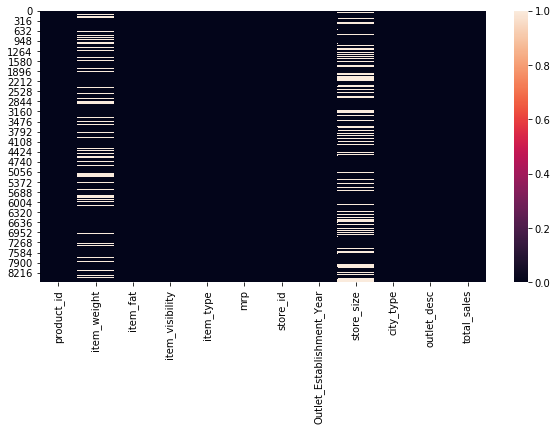

In [9]:
#Visualizing null values
plt.figure(figsize=(10,5))
sns.heatmap(sales.isna())

In [10]:
sales["outlet_desc"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [11]:
#Checking total null values according to following condition
len(sales[(sales["outlet_desc"]=='Supermarket Type1') &  (sales["city_type"]=="Tier 2") & (sales['store_size'].isna())])

1855

In [12]:
#finding unique values for the above condition 
sales[(sales["outlet_desc"]=='Supermarket Type1') &  (sales["city_type"]=="Tier 2")]['store_size'].unique()

array([nan, 'Small'], dtype=object)

In [13]:
#Checking total null values according to following condition
len(sales[(sales["outlet_desc"]=="Grocery Store") & (sales['store_size'].isna())])

555

In [14]:
#finding unique values for the above condition
sales[(sales["outlet_desc"]=="Grocery Store")]['store_size'].unique()

array([nan, 'Small'], dtype=object)

In [15]:
#total null values(according to our condition) in store_size = 2410, that matches the total null values in our preliminary check 
555 + 1855

2410

In [16]:
#We can fill all the null values in store_size with "small" based on our analysis
sales['store_size'].fillna(value= "Small", inplace=True)

In [17]:
#Finding different types of outlets
sales['outlet_desc'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [18]:
#replacing the words with short names
sales['outlet_desc']= sales['outlet_desc'].str.replace("Supermarket Type1","SM1")
sales['outlet_desc']= sales['outlet_desc'].str.replace("Supermarket Type2","SM2")
sales['outlet_desc']= sales['outlet_desc'].str.replace("Supermarket Type3","SM3")
sales['outlet_desc']= sales['outlet_desc'].str.replace("Grocery Store","GS")

In [19]:
#checking unique values for item_fat
sales['item_fat'].unique()  #result shows that there are only two categories(Regular and Low fat) with different names 

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [20]:
#Grouping the same items by replacing with one name only
sales['item_fat'] = sales['item_fat'].str.replace('Low Fat','LF')
sales['item_fat'] = sales['item_fat'].str.replace('low fat','LF')
sales['item_fat'] = sales['item_fat'].str.replace('Regular','reg')


In [21]:
#Rechecking 
sales['item_fat'].unique()

array(['LF', 'reg'], dtype=object)

In [22]:
#creating broad categories for products from product_id and returning back to product_id column
product=[]
for i in range(0,len(sales)):
    product.append(sales['product_id'][i][0:2])
sales['product_id']= product
sales=sales.rename({'product_id':'product'},axis=1)

In [23]:
#Many products have visibility zero means the data is not entered correctly or they were out of stock. 
#Finding mean of item_visibility according to the product
sales.groupby(["product"])['item_visibility'].mean()

product
DR    0.063099
FD    0.068332
NC    0.059222
Name: item_visibility, dtype: float64

In [24]:
#Imputing the zeros in item_visibility according to the mean of each product
#sales.groupby(["product"])['item_visibility'].mean()
def fill(sales):
    if ((sales['item_visibility']==0) & (sales['product'] =='DR')):
        return(0.063)
    elif ((sales['item_visibility']==0) & (sales['product'] =='FD')):
        return(0.068)
    elif ((sales['item_visibility']==0) & (sales['product'] =='NC')):
        return(0.059)
    
    else:
        return(sales['item_visibility'])
sales['item_visibility']= sales[['item_visibility','product']].apply(fill,axis=1)

In [25]:
any(sales['item_visibility']==0)

False

In [26]:
#filling null values in item_weight according to the mean weight of type of item 
sales['item_weight'].fillna(sales.groupby(["item_type"])['item_weight'].transform("mean"),inplace=True)

In [27]:
#Creating a new varible to know the years store has is in operation
sales['years_operated']= max(sales['Outlet_Establishment_Year'])- sales['Outlet_Establishment_Year']

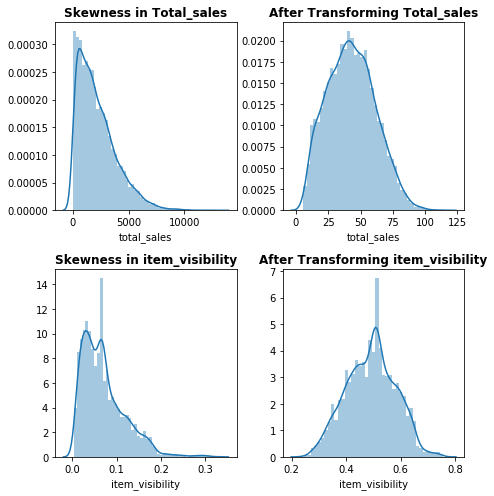

In [28]:
#Visualizing total sales  and item_visibility to normally distributed applying transformations 
fig,ax= plt.subplots(2,2,figsize=(7,7))
sns.distplot(((sales['total_sales'])), ax=ax[0,0]).set_title("Skewness in Total_sales",fontweight="bold", fontsize=12)
sns.distplot(((np.sqrt(sales['total_sales']))), ax=ax[0,1]).set_title("After Transforming Total_sales",fontweight="bold", fontsize=12)
sns.distplot(sales['item_visibility'],ax=ax[1,0]).set_title("Skewness in item_visibility",fontweight="bold", fontsize=12)
sns.distplot(np.sqrt(np.sqrt(sales['item_visibility'])),ax=ax[1,1]).set_title("After Transforming item_visibility",fontweight="bold", fontsize=12)
plt.tight_layout()

In [29]:
#As the data is much skewed for item_visibility and total_sales, I am transfroming the variables to minimize skewness
sales['total_sales']= np.sqrt(sales['total_sales'])
sales['item_visibility']= np.sqrt(np.sqrt(sales['item_visibility']))
sales=  sales.rename({'item_visibility':"qrt_root_item_visibility", 'total_sales':'sqrt_total_sales'},axis=1)

In [30]:
#Now we got rid of null values
sales.isna().sum() 

product                      0
item_weight                  0
item_fat                     0
qrt_root_item_visibility     0
item_type                    0
mrp                          0
store_id                     0
Outlet_Establishment_Year    0
store_size                   0
city_type                    0
outlet_desc                  0
sqrt_total_sales             0
years_operated               0
dtype: int64

In [31]:
#Checking Skewness
sales.skew()

item_weight                  0.089537
qrt_root_item_visibility    -0.025753
mrp                          0.127202
Outlet_Establishment_Year   -0.396641
sqrt_total_sales             0.234676
years_operated               0.396641
dtype: float64

# EXPLORATORY ANALYSIS
Exploratory Data Analysis is important because it allows the analyst to make critical decisions about what is interesting to pursue and what probably isn’t worth following up on and thus building a hypothesis using the relationships between variables.

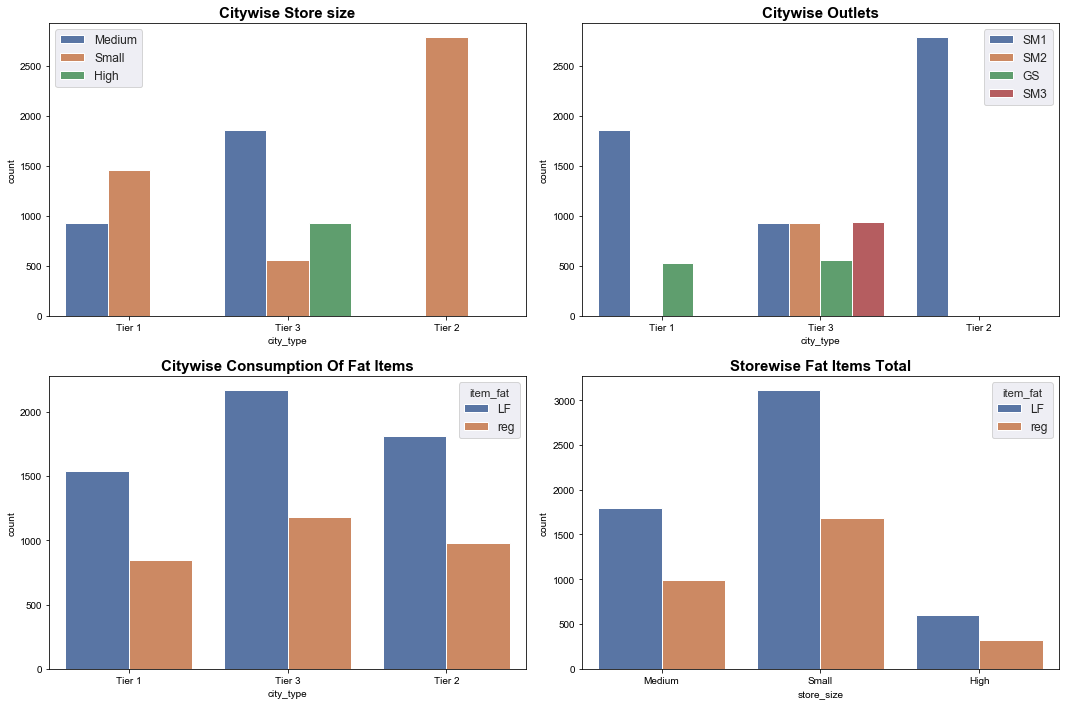

In [32]:
fig, ax= plt.subplots(nrows=2,ncols=2, figsize=(15,10))
sns.set(font_scale = 1.1)
sns.countplot(sales['city_type'],hue=sales['store_size'], ax=ax[0,0]).set_title("Citywise Store size",weight="bold", fontsize=15)
ax[0,0].legend(loc=2)

sns.countplot(sales['city_type'],hue=sales['outlet_desc'], ax=ax[0,1]).set_title("Citywise Outlets",weight="bold", fontsize=15)
ax[0,1].legend(loc=1)

sns.countplot(sales['city_type'],hue=sales['item_fat'], ax=ax[1,0]).set_title("Citywise Consumption Of Fat Items",weight="bold", fontsize=15)

sns.countplot(sales['store_size'],hue=sales['item_fat'], ax=ax[1,1]).set_title("Storewise Fat Items Total",weight="bold", fontsize=15)

plt.tight_layout()

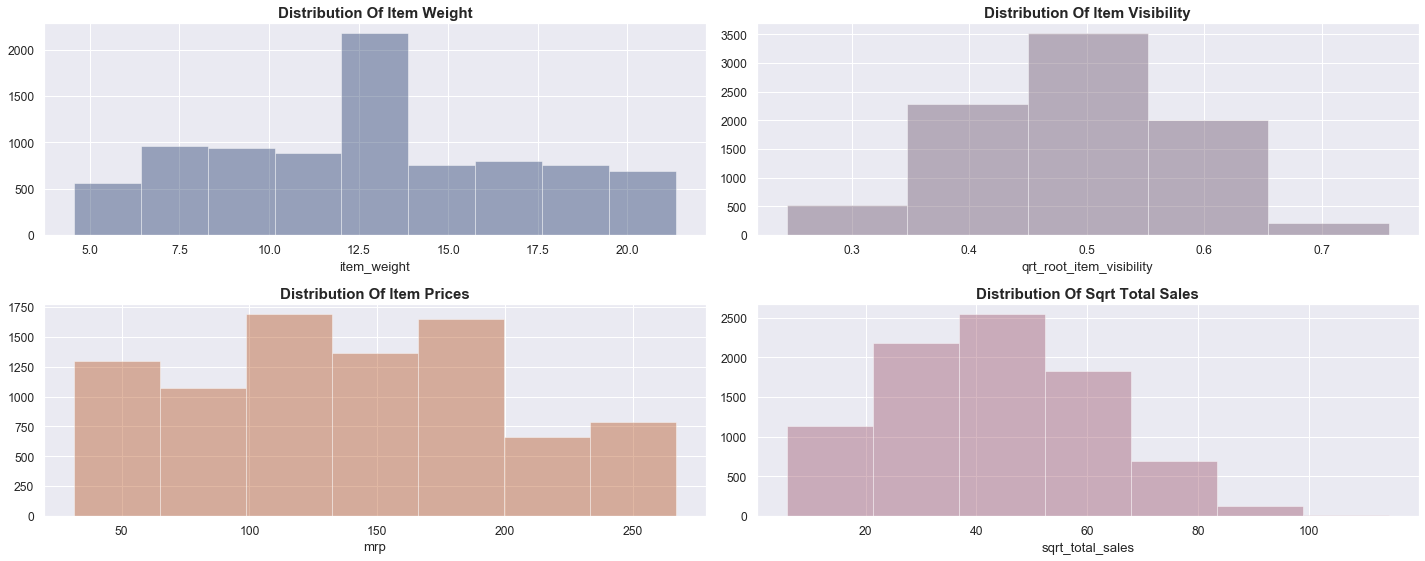

In [33]:
fig,ax= plt.subplots(nrows=2,ncols=2,figsize=(20,8))
sns.set(font_scale = 1.1)
sns.distplot(sales['item_weight'], ax=ax[0,0], bins=9, kde=False, color=(0.1, 0.2, 0.4, 0.6)).set_title("Distribution Of Item Weight",weight="bold", fontsize=15)
sns.distplot(sales['qrt_root_item_visibility'], ax=ax[0,1], bins=5, kde=False,color=(0.4, 0.3, 0.4, 0.6)).set_title("Distribution Of Item Visibility",weight="bold", fontsize=15)
sns.distplot(sales['mrp'], ax=ax[1,0], bins=7, kde=False,color=(0.7, 0.3, 0.1, 0.6)).set_title("Distribution Of Item Prices",weight="bold", fontsize=15)
sns.distplot((sales['sqrt_total_sales']), ax=ax[1,1], bins=7, kde=False,color=(0.6, 0.3, 0.4, 0.6)).set_title("Distribution Of Sqrt Total Sales",weight="bold", fontsize=15)
plt.tight_layout()

Text(0.5, 1.0, 'Mean Weight Of Items')

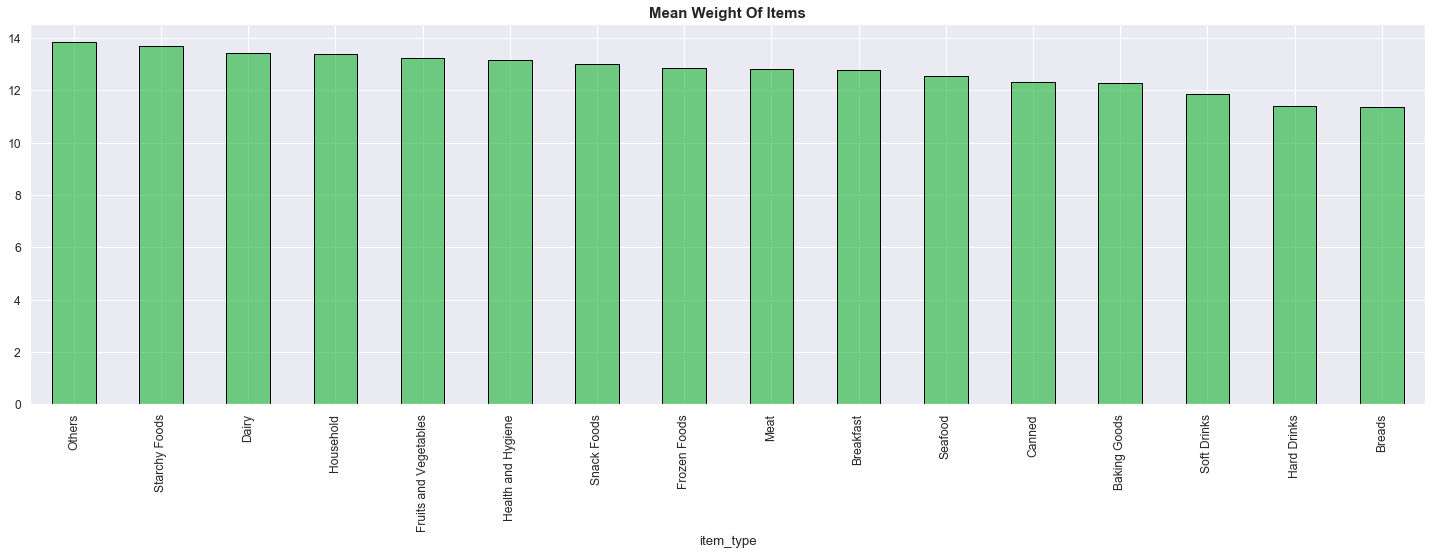

In [34]:
#Mean weight of each type of item
plt.figure(figsize=(25,7))
sales.groupby('item_type').mean()['item_weight'].sort_values(ascending=False).plot.bar(color=(0.1, 0.7, 0.2, 0.6),edgecolor='black')
plt.title("Mean Weight Of Items", fontweight="bold", fontsize=15)

Text(0.5, 1.0, 'Median Price Of Items')

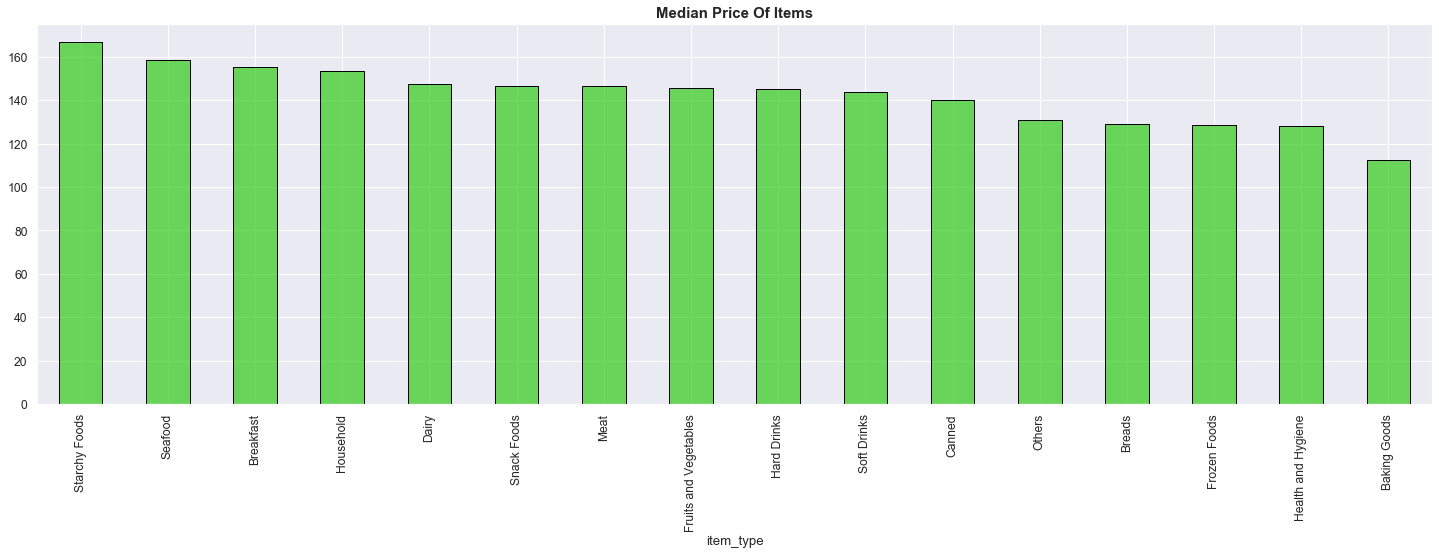

In [35]:
#Which item is the most expensive in stores
plt.figure(figsize=(25,7))
sales.groupby('item_type').median()['mrp'].sort_values(ascending=False).plot.bar(color=(0.2, 0.8, 0.1, 0.7),edgecolor='black')
plt.title("Median Price Of Items", fontweight="bold", fontsize=15)

Text(0.5, 1.0, 'Sqrt Total Sales Per City')

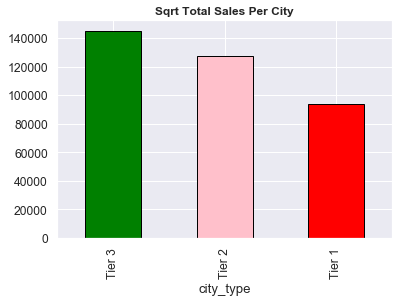

In [36]:
#Which cities are performing well till now
sales.groupby('city_type').sum()['sqrt_total_sales'].sort_values(ascending=False).plot.bar(color=['green','pink','red'],edgecolor='black')
plt.title("Sqrt Total Sales Per City", fontweight="bold", fontsize=12)

Text(0.5, 1.0, 'Mean sqrt Sales Per City')

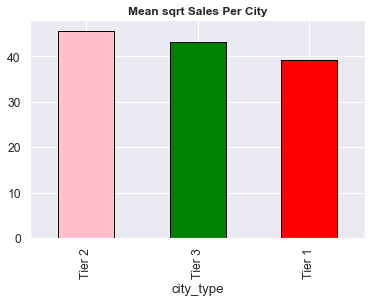

In [37]:
#Though the total sales are most by Tier 3 city but mean of tier2 cities is greater than Tier3 cities as it has only one kind of outlets
sales.groupby('city_type').mean()['sqrt_total_sales'].sort_values(ascending=False).plot.bar(color=['pink','green','red'],edgecolor='black')
plt.title("Mean sqrt Sales Per City", fontweight="bold", fontsize=12)


Text(0.5, 1.0, 'Total Sqrt sales per product')

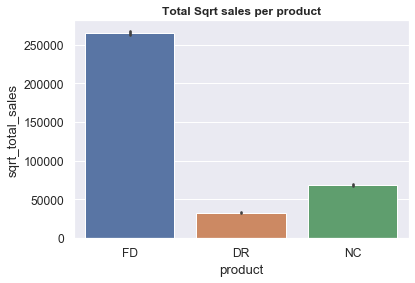

In [38]:
#Total sales per product
sns.barplot(sales['product'], sales['sqrt_total_sales'], estimator=sum)
plt.title("Total Sqrt sales per product", fontweight="bold", fontsize=12)

Text(0.5, 1.0, 'Yearwise Sum Of Sqrt Sales')

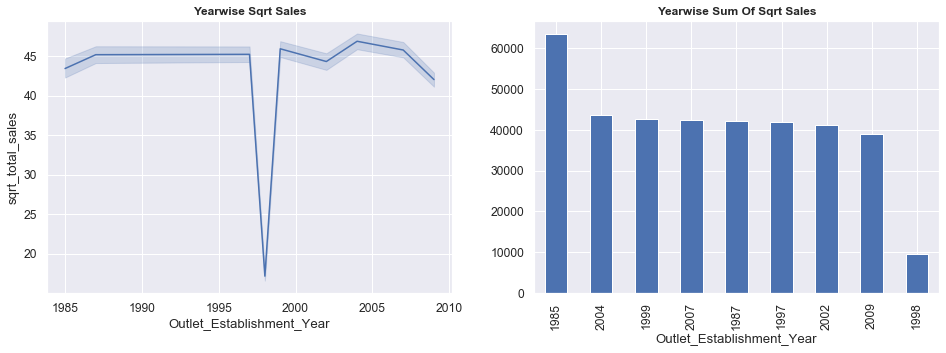

In [39]:
#Total sales according to the year
fig,ax=plt.subplots(nrows=1,ncols=2, figsize=(16,5))
sales.groupby('Outlet_Establishment_Year').sum()['sqrt_total_sales'].sort_values(ascending=False).plot.bar()
sns.lineplot("Outlet_Establishment_Year", "sqrt_total_sales", data=sales,ax=ax[0]).set_title("Yearwise Sqrt Sales", fontweight="bold", fontsize=12)
plt.title("Yearwise Sum Of Sqrt Sales", fontweight="bold", fontsize=12)
#It suggests that the sales were very low in 1998 might be because of recession.

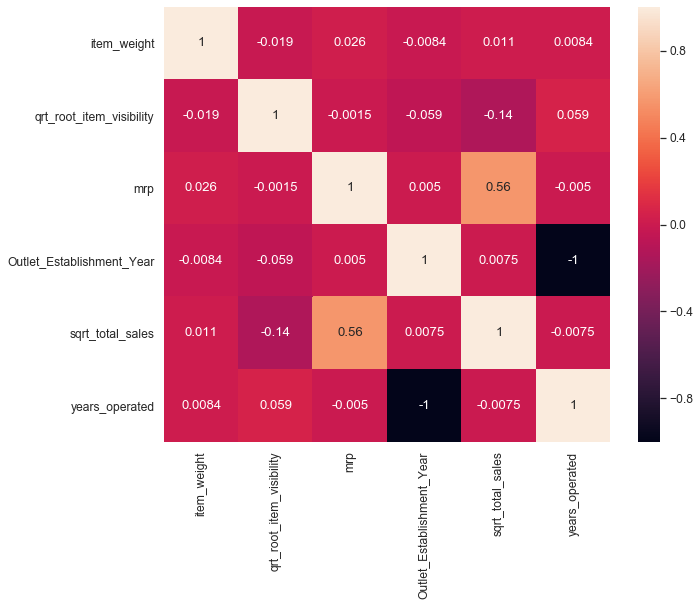

In [40]:
#Checking the correlationn of each quantitative variable with one another
plt.figure(figsize=(10,8))
sns.heatmap(sales.corr(),annot=True)

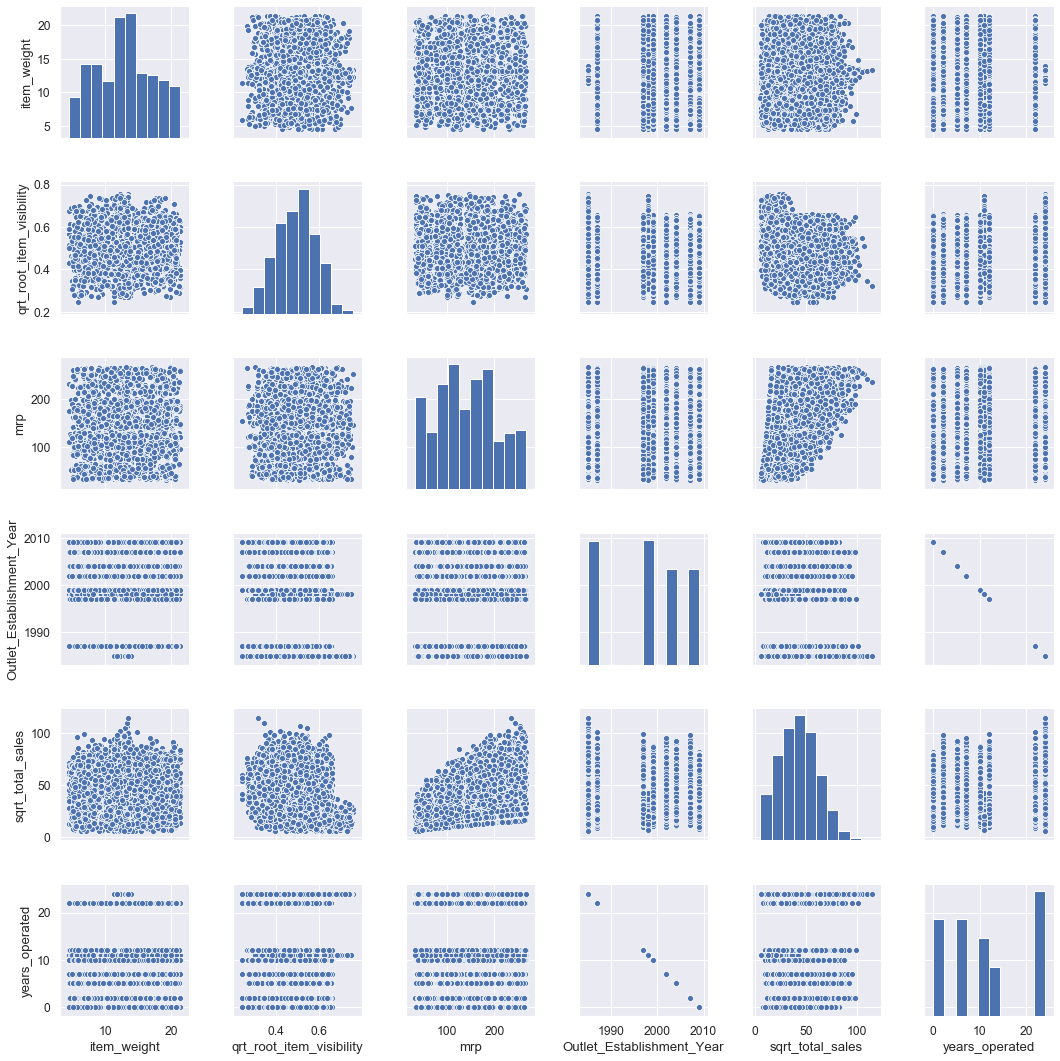

In [41]:
#Pairplot tells us the relationship between all the quantitative variables in a single canvas.
sns.pairplot(sales)

In [42]:
sales.head()

,product,item_weight,item_fat,qrt_root_item_visibility,item_type,mrp,store_id,Outlet_Establishment_Year,store_size,city_type,outlet_desc,sqrt_total_sales,years_operated
0,FD,9.30,LF,0.355918,Dairy,249.8092,OUT049,1999,Medium,Tier 1,SM1,61.115775,10
1,DR,5.92,reg,0.372620,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,SM2,21.057607,0
2,FD,17.50,LF,0.359806,Meat,141.6180,OUT049,1999,Medium,Tier 1,SM1,45.795961,10
3,FD,19.20,reg,0.510655,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,GS,27.062520,11
4,NC,8.93,LF,0.492848,Household,53.8614,OUT013,1987,High,Tier 3,SM1,31.538947,22


# MODEL BUILDING

# Multiple Linear Regression can be modelled in sklearn or statsapi package in python
1. Firt of all, we need to select the variables which we want to put in our model which can be done via preliminary analysis or variable selection techniques which I have not covered in this project.
2. After taking the variables, we must separate them into independent variables and dependent variable.
3. We must split our dataset into test and train to check our model performance.
4. At the end we should fit our model and interpret the results.

In [43]:
#Dropping the columns of no use
sales.drop(['item_type','store_id','Outlet_Establishment_Year',],axis=1, inplace=True)

In [44]:
#Encoding Ordinal data 
size=pd.Categorical(sales.store_size, categories=[ 'Small', 'Medium', 'High'], ordered=True)
labels, unique =pd.factorize(size,sort=True)
sales['store_size']= labels

city= pd.Categorical(sales.city_type, categories=['Tier 1','Tier 2','Tier 3'],ordered=True)
labels, unique= pd.factorize(city, sort=True)
sales['city_type']=labels


In [45]:
#Encoding dummy variables for nominal data
sales= pd.concat([sales, pd.get_dummies(sales['product'],drop_first=True)],axis=1)
sales= pd.concat([sales, pd.get_dummies(sales['item_fat'],drop_first=True)],axis=1)
sales= pd.concat([sales, pd.get_dummies(sales['outlet_desc'],drop_first=True)],axis=1)

In [46]:
#Dropping the columns for which we have created dummy variables
sales.drop(['product','item_fat', 'outlet_desc'], axis=1, inplace=True)

In [47]:
sales.head()

,item_weight,qrt_root_item_visibility,mrp,store_size,city_type,sqrt_total_sales,years_operated,FD,NC,reg,SM1,SM2,SM3
0,9.30,0.355918,249.8092,1,0,61.115775,10,1,0,0,1,0,0
1,5.92,0.372620,48.2692,1,2,21.057607,0,0,0,1,0,1,0
2,17.50,0.359806,141.6180,1,0,45.795961,10,1,0,0,1,0,0
3,19.20,0.510655,182.0950,0,2,27.062520,11,1,0,1,0,0,0
4,8.93,0.492848,53.8614,2,2,31.538947,22,0,1,0,1,0,0


In [48]:
#Splitting our dataset into two datasets
#X is datasrt of independent variables
#y is a dataset of dependent variable i.e. total sales
X= sales.drop(['sqrt_total_sales'],axis=1)
y=sales['sqrt_total_sales']

In [49]:
#Splitting into training and test dataset
Xtrain, Xtest, ytrain, ytest= train_test_split(X,y,test_size=0.35 )

In [50]:
#Checking the length of our training and test dataset
len(Xtrain), len(ytrain), len(Xtest), len(ytest)

(5539, 5539, 2984, 2984)

In [51]:
#Fitting linear regression model
lr=LinearRegression()
lr.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
#Making dataframe of coefficients
coeff_df= pd.DataFrame(lr.coef_,X.columns,columns=['Coefficients'])
coeff_df

,Coefficients
item_weight,-0.000202
qrt_root_item_visibility,-1.100104
mrp,0.167484
store_size,0.770128
city_type,-0.286435
years_operated,-0.080819
FD,-0.345473
NC,-0.203409
reg,0.813629
SM1,27.138803


In [53]:
#Predicting on our test set
y_pred = lr.predict(Xtest)

In [54]:
#Creating dataframe of actual values and out predictions from the model
predictions = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})
predictions.head()

,Actual,Predicted
3205,13.775086,25.040257
2547,51.178679,52.566573
6087,38.497673,39.137530
7524,57.408275,44.138606
7084,47.718298,35.064590


In [55]:
#Checking our errors and R^2 value
print("R squared value is:", metrics.r2_score(ytest,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

R squared value is: 0.6602394911076026
Mean Absolute Error: 8.331332945880602
Mean Squared Error: 114.67541802074976
Root Mean Squared Error: 10.708660888306705


Text(0.5, 1.0, 'Actual values vs Predictions (First 25)')

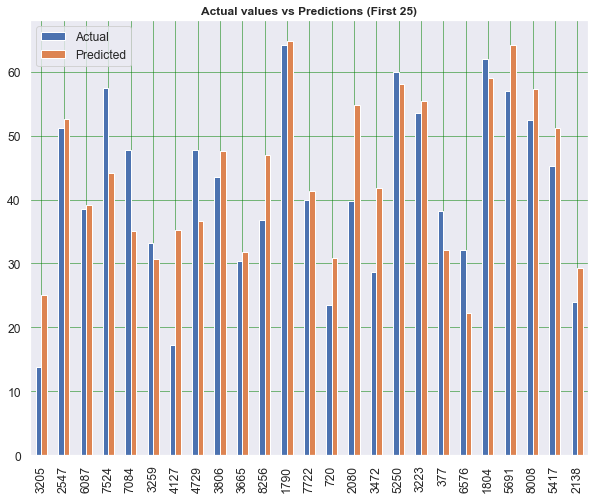

In [56]:
#Plotting our predictions with respect to the actual values
predictions.head(25).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual values vs Predictions (First 25)", fontweight="bold", fontsize=12)

In [57]:
#Calculating residuals
residuals= ytest- y_pred

# Checking Assumptions of Linear Regression

# There are three main assumptions of linear regression:
  1. Equal Variance or homoscedasticity: There should be no clear pattern in the distribution; if there is a cone-shaped pattern, the data is heteroscedastic.<br>
  2. Normality: Secondly, the multiple linear regression analysis requires that the errors between observed and predicted values (i.e., the residuals of the regression) should be normally distributed. This assumption may be checked by looking at a histogram of residuals.<br>
  3. Linearity: Multiple linear regression requires the relationship between the independent and dependent variables to be linear.  The linearity assumption can best be tested with scatterplots.
    

Text(0.5, 0, 'Predictited values')

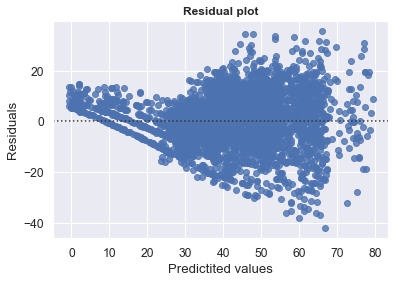

In [58]:
#My scatterplot of residuals vs fitted values shows homoscedasticity, an assumption of linear regression
#Our model is showing heteroscadesticity, which is violating our linear regression assumption
#It might be due to missing independent variables or might be our model require another transformation 
sns.residplot(y_pred,residuals).set_title("Residual plot", fontsize=12, fontweight="bold")
plt.ylabel("Residuals")
plt.xlabel("Predictited values")

Text(0.5, 0, 'Residuals')

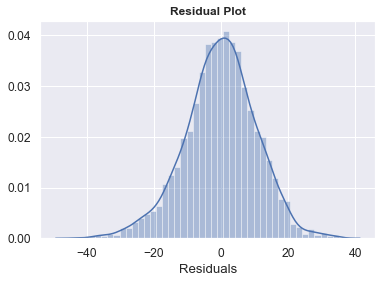

In [59]:
#Histogram of residuals shows normality, an assumption of linear regression  
sns.distplot(residuals).set_title("Residual Plot",fontweight="bold", fontsize=12)
plt.xlabel("Residuals")

Text(0, 0.5, 'Observed')

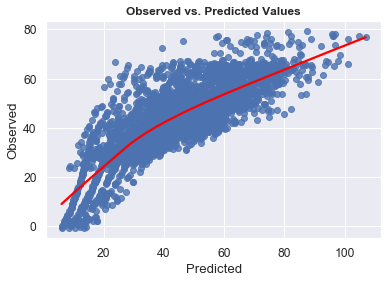

In [61]:
#Following regplot shows the assumption of linearity is not completely satisfied
sns.regplot(ytest, y_pred, lowess=True, line_kws={'color': 'red'}).set_title('Observed vs. Predicted Values', fontsize=12, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Observed')